<a href="https://colab.research.google.com/github/yashkarbhari/EfficientNet-TransferLearning/blob/master/TL_EfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from keras.datasets import cifar10

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print((x_train.shape, y_train.shape))
print((x_val.shape, y_val.shape))
print((x_test.shape, y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [5]:
train_generator = ImageDataGenerator(rotation_range = 2, horizontal_flip = True, vertical_flip = True, zoom_range = .1)

val_generator = ImageDataGenerator(rotation_range = 2, horizontal_flip = True, vertical_flip = True, zoom_range = .1)

test_generator = ImageDataGenerator(rotation_range = 2, horizontal_flip = True, vertical_flip = True, zoom_range = .1)

train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [13]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
lrr = ReduceLROnPlateau(monitor = 'accuracy', factor = .01, patience = 3, min_lr = 1e-5)

In [7]:
!pip install -U git+https://github.com/qubvel/efficientnet

  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-vxrenixx
  Running command git clone -q https://github.com/qubvel/efficientnet /tmp/pip-req-build-vxrenixx
  Created wheel for efficientnet: filename=efficientnet-1.1.0-cp36-none-any.whl size=18424 sha256=8a6c627e82fdaa9a74d092f0603fe1755485aba9fa7a0ab1696e277b91c64b5d
  Stored in directory: /tmp/pip-ephem-wheel-cache-89p07gsw/wheels/64/60/2e/30ebaa76ed1626e86bfb0cc0579b737fdb7d9ff8cb9522663a
Successfully built efficientnet
  Found existing installation: efficientnet 1.1.0
    Uninstalling efficientnet-1.1.0:
      Successfully uninstalled efficientnet-1.1.0


In [8]:
import efficientnet.keras as enet

In [9]:
base_model  = enet.EfficientNetB5(include_top=False, weights="imagenet", input_shape=(32,32,3),classes=y_train.shape[1])

In [10]:
model= Sequential()
model.add(base_model) 
model.add(Flatten()) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b5 (Functional) (None, 1, 1, 2048)        28513520  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
Total params: 28,513,520
Trainable params: 28,340,784
Non-trainable params: 172,736
_________________________________________________________________


In [11]:
model.add(Dense(1024,activation=('relu'),input_dim=512))

model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
#model.add(Dropout(.3))
model.add(Dense(128,activation=('relu')))
#model.add(Dropout(.2))
model.add(Dense(10,activation=('softmax'))) 

#Checking the final model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b5 (Functional) (None, 1, 1, 2048)        28513520  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1

In [14]:
batch_size= 100
epochs=50
learn_rate=.001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(train_generator.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size = batch_size), validation_steps = 250,  callbacks = [lrr], verbose = 1)


Epoch 1/50
350/350 [==============================] - 42s 119ms/step - loss: 1.8409 - accuracy: 0.3266
Epoch 2/50
350/350 [==============================] - 41s 119ms/step - loss: 1.6356 - accuracy: 0.3989
Epoch 3/50
350/350 [==============================] - 42s 119ms/step - loss: 1.4805 - accuracy: 0.4586
Epoch 4/50
350/350 [==============================] - 42s 119ms/step - loss: 1.3623 - accuracy: 0.5064
Epoch 5/50
350/350 [==============================] - 41s 118ms/step - loss: 1.2709 - accuracy: 0.5409
Epoch 6/50
350/350 [==============================] - 41s 118ms/step - loss: 1.1988 - accuracy: 0.5674
Epoch 7/50
350/350 [==============================] - 41s 118ms/step - loss: 1.1379 - accuracy: 0.5937
Epoch 8/50
350/350 [==============================] - 41s 117ms/step - loss: 1.0816 - accuracy: 0.6129
Epoch 9/50
350/350 [==============================] - 42s 120ms/step - loss: 1.0343 - accuracy: 0.6325
Epoch 10/50
350/350 [==============================] - 42s 120ms/step - l

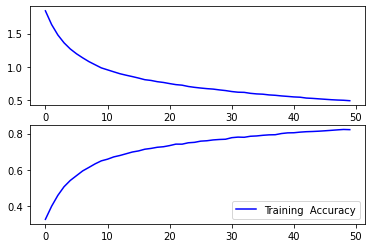

In [16]:
import matplotlib.pyplot as plt
#Plotting the training and validation loss

f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')

plt.legend()

In [17]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
        xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Confusion matrix, without normalization


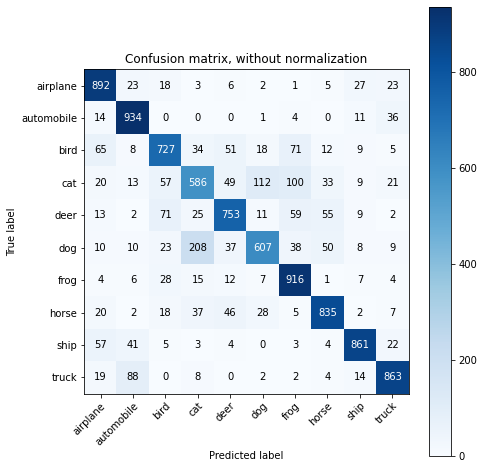

In [18]:
y_pred=model.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')


Normalized confusion matrix


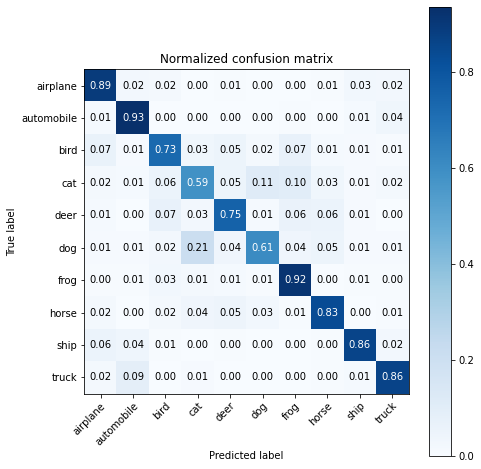

In [19]:
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')


In [20]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

Accuracy Score =  0.7974
